In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Flatten
import cv2
import os

Using TensorFlow backend.
/home/dhriti/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dhriti/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dhriti/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dhriti/.local/lib/python3.6/site-packages/tensorflow/python

In [2]:
def load_images(image_array,path,nimages_oftype):
    prev_length=len(image_array)
    image_names=[]
    image_names=os.listdir(abs+path)

    for i in image_names:
        img=cv2.imread(abs+path+i)
        
        if(img is not None):
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            image_array.append(img)
    
    nimages_oftype.append(len(image_array))

In [3]:
def resize(images):
    n=len(images)
    for i in range(n):
        images[i] = cv2.resize(images[i],(80,80))

In [4]:
abs="flowers-recognition/flowers/"

path0="daisy/"
path1="dandelion/"
path2="rose/"
path3="sunflower/"
path4="tulip/"

In [5]:
image_array=[]
nimages_oftype=[]

In [6]:
load_images(image_array,path0,nimages_oftype)
load_images(image_array,path1,nimages_oftype)
load_images(image_array,path2,nimages_oftype)
load_images(image_array,path3,nimages_oftype)
load_images(image_array,path4,nimages_oftype)

In [7]:
labels=np.zeros(len(image_array))
labels[nimages_oftype[0]:nimages_oftype[1]]=1
labels[nimages_oftype[1]:nimages_oftype[2]]=2
labels[nimages_oftype[2]:nimages_oftype[3]]=3
labels[nimages_oftype[3]:]=4

In [8]:
resize(image_array)

In [9]:
image_array=np.array(image_array)
labels=np.array(labels)

In [10]:
chosen_idx = np.random.choice(len(image_array), replace=False, size=1000)
new_image_array = image_array[chosen_idx]
new_labels = labels[chosen_idx]

In [11]:
#split into training and test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(new_image_array, new_labels, test_size=0.2, 
                                                    random_state=200)

In [12]:
#categorically encode the data
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

/home/dhriti/.local/lib/python3.6/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


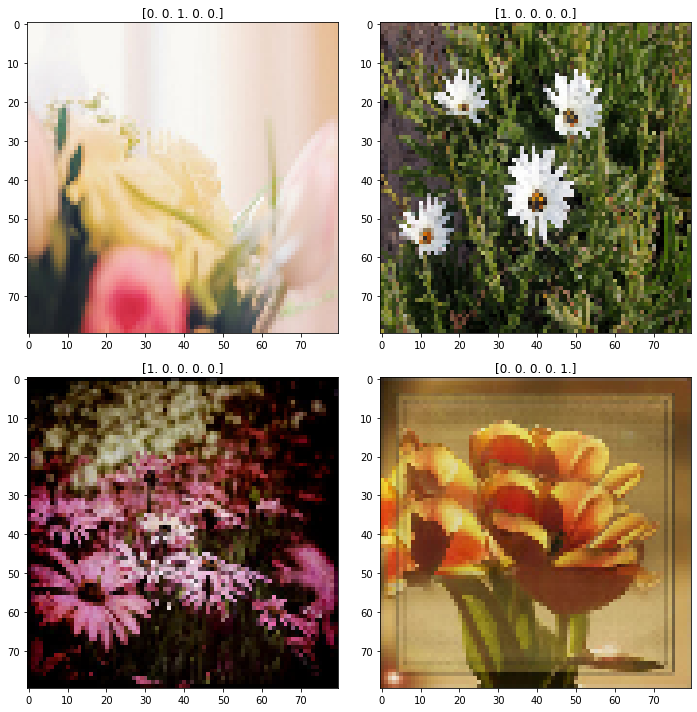

In [13]:
#Visualize data and check corectness of split
vis_index=np.random.choice(1000, replace=False, size=4)
view_image_array = new_image_array[vis_index]
view_labels = new_labels[vis_index]

view_labels=to_categorical(view_labels)

fig,ax=plt.subplots(2,2)
fig.set_size_inches(10,10)
num=0
for i in range(2):
    for j in range (2):
        #l=rn.randint(0,len(Z))
        ax[i,j].imshow(view_image_array[num])
        ax[i,j].set_title(view_labels[num])
        num=num+1
        
plt.tight_layout()

In [14]:
vis_index
(view_labels[0].argmax)

<function ndarray.argmax>

In [15]:
#Build model
from keras.models import Sequential
from keras.layers import Dropout, BatchNormalization

In [16]:
model = Sequential()

In [17]:
#1
model.add(Conv2D(filters = 32, kernel_size = (5,5) , input_shape = (80,80,3),
                 padding = 'Same',activation ='relu'))
model.add(Dropout(rate=0.5))
model.add(MaxPooling2D())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [18]:
#2
model.add(Conv2D(filters = 64, kernel_size = (4,4) ,
                 padding = 'Same',activation ='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D())

In [19]:
#3
model.add(Conv2D(filters = 96, kernel_size = (3,3) ,
                 padding = 'Same',activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

In [20]:
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(5, activation = "softmax"))

In [21]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 80, 80, 32)        2432      
_________________________________________________________________
dropout_1 (Dropout)          (None, 80, 80, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 40, 64)        32832     
_________________________________________________________________
batch_normalization_1 (Batch (None, 40, 40, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 96)        55392     
__________

In [22]:
history=model.fit(x_train,y_train,batch_size=128,epochs=20, validation_split=.1)
loss,accuracy=model.evaluate(x_test,y_test)

Instructions for updating:
Use tf.cast instead.
Train on 720 samples, validate on 80 samples
Epoch 1/20
720/720 [==============================] - 19s 26ms/step - loss: 3.3101 - acc: 0.6956 - val_loss: 2.9652 - val_acc: 0.6950
Epoch 2/20
720/720 [==============================] - 17s 23ms/step - loss: 2.4000 - acc: 0.7225 - val_loss: 3.1285 - val_acc: 0.6900
Epoch 3/20
720/720 [==============================] - 17s 23ms/step - loss: 1.8128 - acc: 0.7522 - val_loss: 2.5103 - val_acc: 0.6800
Epoch 4/20
720/720 [==============================] - 17s 23ms/step - loss: 1.3390 - acc: 0.7733 - val_loss: 3.9135 - val_acc: 0.6950
Epoch 5/20
720/720 [==============================] - 17s 23ms/step - loss: 1.1003 - acc: 0.7875 - val_loss: 2.2540 - val_acc: 0.6975
Epoch 6/20
720/720 [==============================] - 17s 24ms/step - loss: 0.8036 - acc: 0.8319 - val_loss: 2.4278 - val_acc: 0.6900
Epoch 7/20
720/720 [==============================] - 17s 24ms/step - loss: 0.7047 - acc: 0.8311 - val_

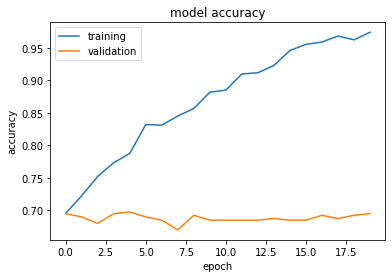

In [23]:
#Plotting
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

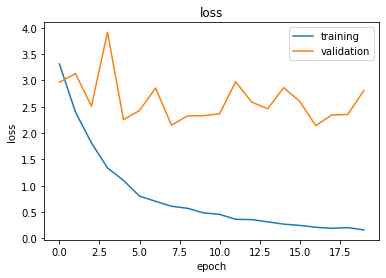

In [24]:
#Plotting
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [25]:
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

Test loss: 2.32
Test accuracy: 0.725
